#### in questo notebook creo un grafo che rappresenta un labirinto e costruiro un agente  utonomo in grado di uscire da questo labirinto 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx

#### Costruisco un percorso di una mappa immaginaria
che porti dal punto di partenza(0) al punto di traguardo punto(7) facendo in modo che siano presenti dei percorsi alternativi 


<function matplotlib.pyplot.show(close=None, block=None)>

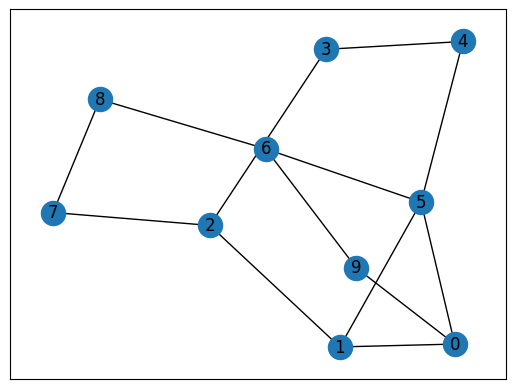

In [3]:
points_list = [(0,1), (0,5), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7), (6,8), (6,9), (3,4), (9,0), (7,8)]

goal = 7 

G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show

#### Creo una R-Table e di una matrice delle ricompense (dove il numero sara pari ai punti del percorso)

In [4]:
Matrix_Size = 10 
R = np.ones(shape=(Matrix_Size, Matrix_Size)) * -1

#### Modifico i valori della matrice delle ricompense secondo il nostro percoso in points_list
assegnando 0 alle strade percorribili e 100 come premio per essere giunti alla fine 

In [6]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point] = 100
    else:
        R[point[::-1]] = 0
R[goal, goal] = 100
print('\n', R)

(0, 1)
(0, 5)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
(6, 8)
(6, 9)
(3, 4)
(9, 0)
(7, 8)

 [[ -1.   0.  -1.  -1.  -1.   0.  -1.  -1.  -1.   0.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 100.  -1.  -1.]
 [ -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.   0.   0.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1. 100. 100.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.]]


#### Creo la Q-Table
per tenere traccia delle esperienze passate durante l'addestramento 

In [9]:
Q = np.zeros([Matrix_Size, Matrix_Size])
gamma = 0.9

initial_state = 1

def available_actions(state): #ritorna le azioni possibili da un determinato stato
    current_state_row = R[state]
    av_act = np.where(current_state_row >= 0)
    return av_act 

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range): #selezione casuale di una delle azioni possibili
    next_action_id = np.random.choice(len(available_actions_range))
    return available_actions_range[next_action_id]

action = sample_next_action(available_act)

def update(current_state, action, gamma):  #aggiornamento Q-table, selezione azione piu vantagiosa
    max_index = np.where(Q[action] == np.max(Q[action]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index] 

    #Aggiornamento Q-Table in base all'azione attuale
    Q[current_state, action] = R[current_state, action] + gamma * max_value

    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q) * 100))
    else:
        return(0)

update(initial_state, action, gamma)

0

#### Addestramento

In [16]:
scores = [] 
for i in range(1000):
    # Parto da un punto qualsiasi
    current_state = np.random.randint(0, Q.shape[0])
    # Verifico quali azioni posso compiere
    available_act = available_actions(current_state)
    # Seleziono la prossima azione
    action = sample_next_action(available_act)
    # Aggiorno il punteggio
    score = update(current_state, action, gamma)
    # Aggiungo il punteggio attuale alla storie dei punteggi
    scores.append(score)
    print('Punteggio:', str(score))

print("Q-table dopo l'addestramento:")
print(Q / np.max(Q) * 100)

Punteggio: 934.4099902456953
Punteggio: 934.409990980277
Punteggio: 934.409990980277
Punteggio: 934.4099937413685
Punteggio: 934.4099937413685
Punteggio: 934.4099937413685
Punteggio: 934.4099937413685
Punteggio: 934.4099937413685
Punteggio: 934.4099937413685
Punteggio: 934.4099937413685
Punteggio: 934.4099937413685
Punteggio: 934.4099937413685
Punteggio: 934.4099944024921
Punteggio: 934.4099985458288
Punteggio: 934.4099985458288
Punteggio: 934.4099985458288
Punteggio: 934.4099985458288
Punteggio: 934.4099997916107
Punteggio: 934.4099997916107
Punteggio: 934.4099997916107
Punteggio: 934.4099997916107
Punteggio: 934.4099965655982
Punteggio: 934.4099965655982
Punteggio: 934.4099965655982
Punteggio: 934.4099969135582
Punteggio: 934.4099969135582
Punteggio: 934.4099969135582
Punteggio: 934.4099969135582
Punteggio: 934.4099975085694
Punteggio: 934.409998243151
Punteggio: 934.4099985911108
Punteggio: 934.4099956876996
Punteggio: 934.4099956876996
Punteggio: 934.4099956876996
Punteggio: 934.40

#### Testing

Miglior percorso trovato:
[0, 1, 2, 7]


<function matplotlib.pyplot.show(close=None, block=None)>

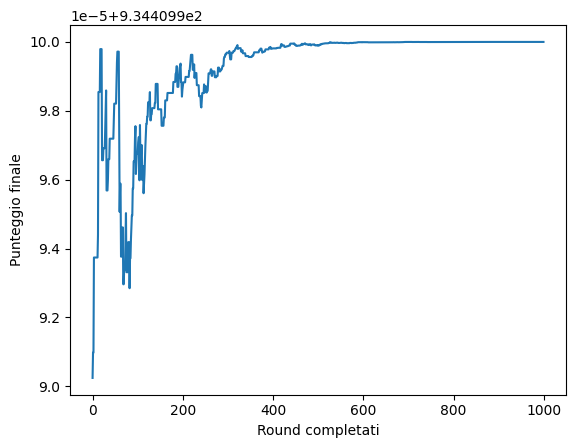

In [17]:
current_state = 0
steps = [current_state]

#Loop finche non raggiungiamo la destinazione
while current_state != 7:
    # Seleziona la prossima migliore azione possibile
    next_step_index = np.argmax(Q[current_state])
    # Aggiungo l'azione scelta all'elenco delle azioni compiute
    steps.append(next_step_index)
    # Aggiorno lo stato attuale
    current_state = next_step_index

print("Miglior percorso trovato:")
print(steps)

plt.plot(scores)
plt.ylabel("Punteggio finale")
plt.xlabel("Round completati")
plt.show

In [15]:
print(Q)

[[  0.         809.99996868   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.         899.9999652    0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.         999.99996134   0.           0.        ]
 [  0.           0.         899.9999652    0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.         809.99992725   0.
    0.           0.           0.           0.           0.        ]
 [  0.         809.99996134   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  728.9999652    0.           0.           0.           0.        ]
 [  0.           0.         899.99995704   0.           0.
    0.           0.         999.99995704 100.       